dict_keys(['points', 'control_net', 'nurbs_surface', 'tfm', 'rotation_angle', 'z_gap'])
[[[[0.00615114 0.01176471 0.        ]
   [0.00527241 0.02352941 0.004296  ]
   [0.00702988 0.04705882 0.01959072]
   ...
   [0.00351494 0.9529412  0.61819386]
   [0.00966608 0.9647059  0.646625  ]
   [0.00351494 0.9882353  0.6393226 ]]

  [[0.02987698 0.         0.01298136]
   [0.0228471  0.02352941 0.02123317]
   [0.02987698 0.04705882 0.03786811]
   ...
   [0.02372584 0.9529412  0.64627844]
   [0.02899824 0.9647059  0.6888381 ]
   [0.02636204 0.9882353  0.68983185]]

  [[0.04657293 0.01176471 0.02703554]
   [0.04745167 0.02352941 0.04940481]
   [0.04481547 0.04705882 0.05609328]
   ...
   [0.04745167 0.9529412  0.69268477]
   [0.04657293 0.9647059  0.7166221 ]
   [0.04481547 0.9882353  0.7273376 ]]

  ...

  [[0.9551845  0.         0.066429  ]
   [0.956942   0.02352941 0.07956385]
   [0.9551845  0.04705882 0.09671779]
   ...
   [0.9560633  0.9529412  0.74289185]
   [0.9551845  0.9764706  0.7598733

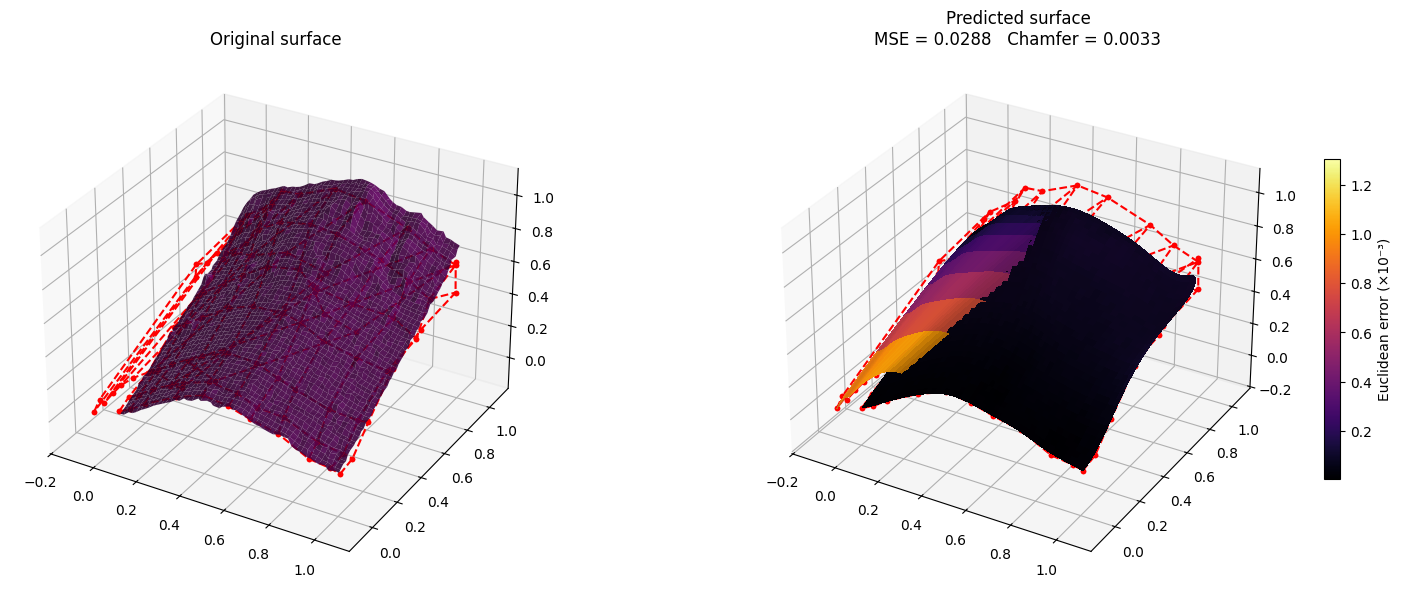

|   mse_surface |   chamfer_surface |   mse_ctrl_net |   chamfer_ctrl_net |
|--------------:|------------------:|---------------:|-------------------:|
|      0.028831 |          0.003343 |       0.000000 |           0.000000 |


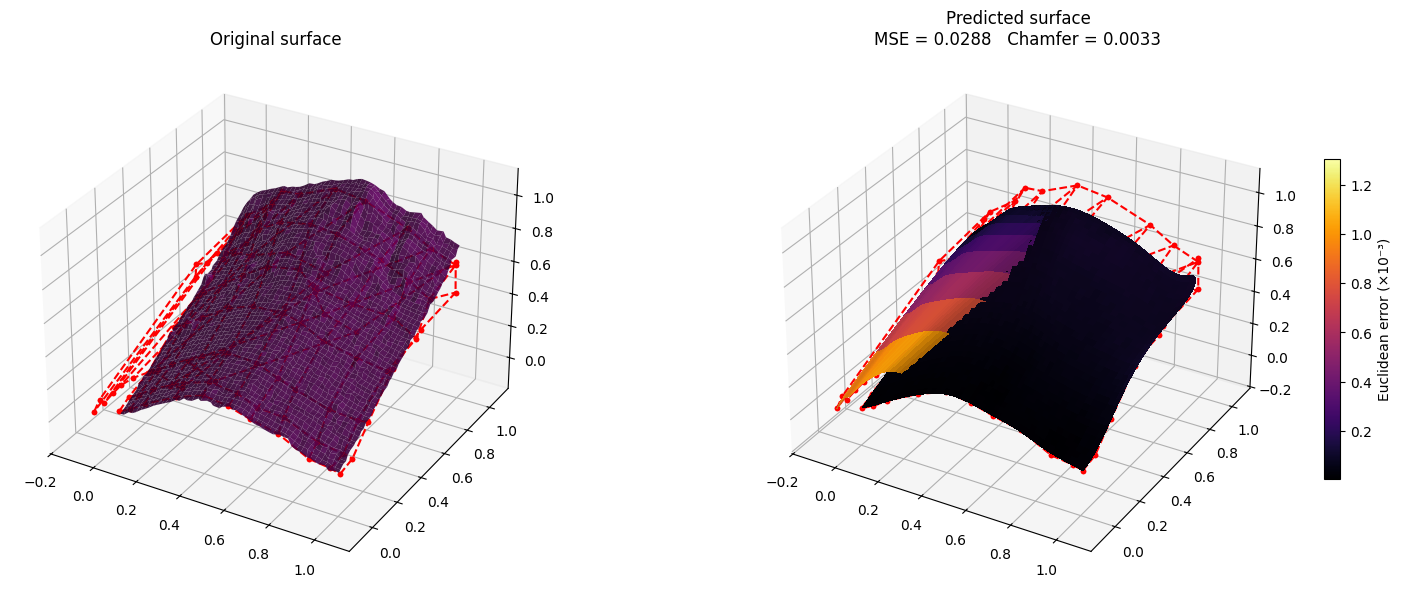

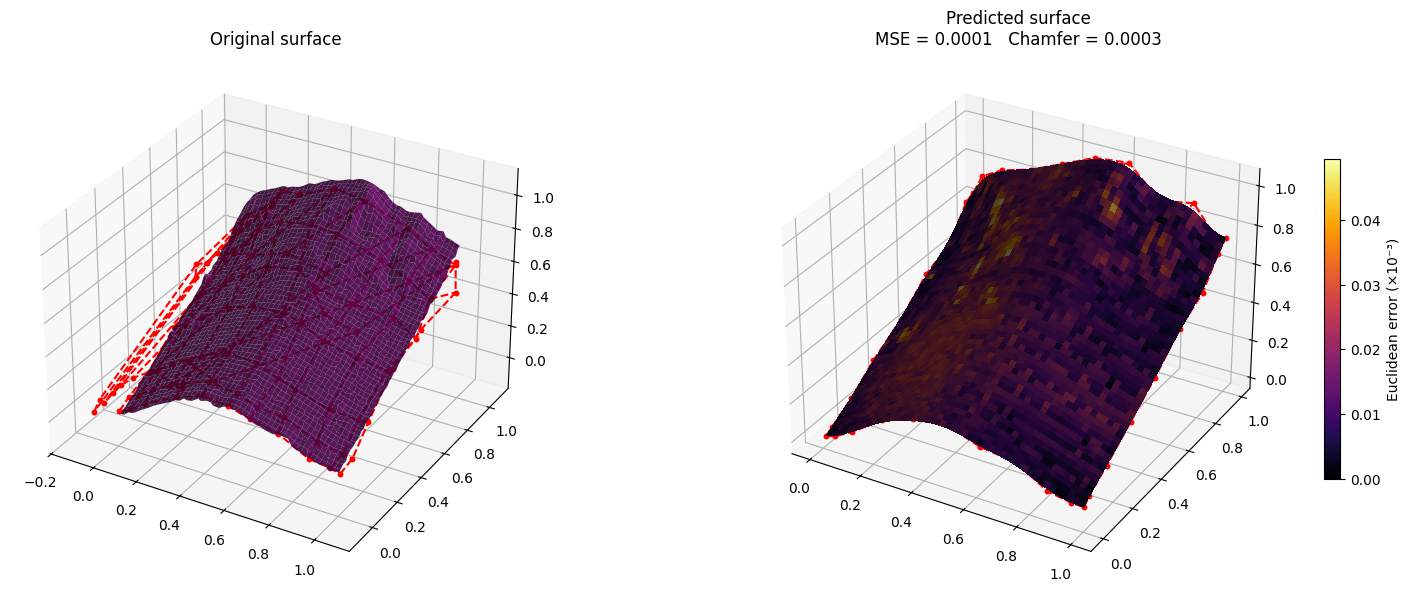

Shapes:
  Approximated CN : (11, 9, 3)
  Predicted CN    : (11, 9, 3)
  Original CN     : (11, 9, 3)
MSE  (Predicted  CN vs Original): 0.000000
MSE  (Approximated CN vs Original): 0.069346
Chamfer (Predicted  CN vs Original): 0.000000
Chamfer (Approximated CN vs Original): 0.011208
MSE  (Predicted  Surface vs Original): 0.028831
MSE  (Approximated Surface vs Original): 0.000075
Chamfer (Predicted  Surface vs Original): 0.003343
Chamfer (Approximated Surface vs Original): 0.000245


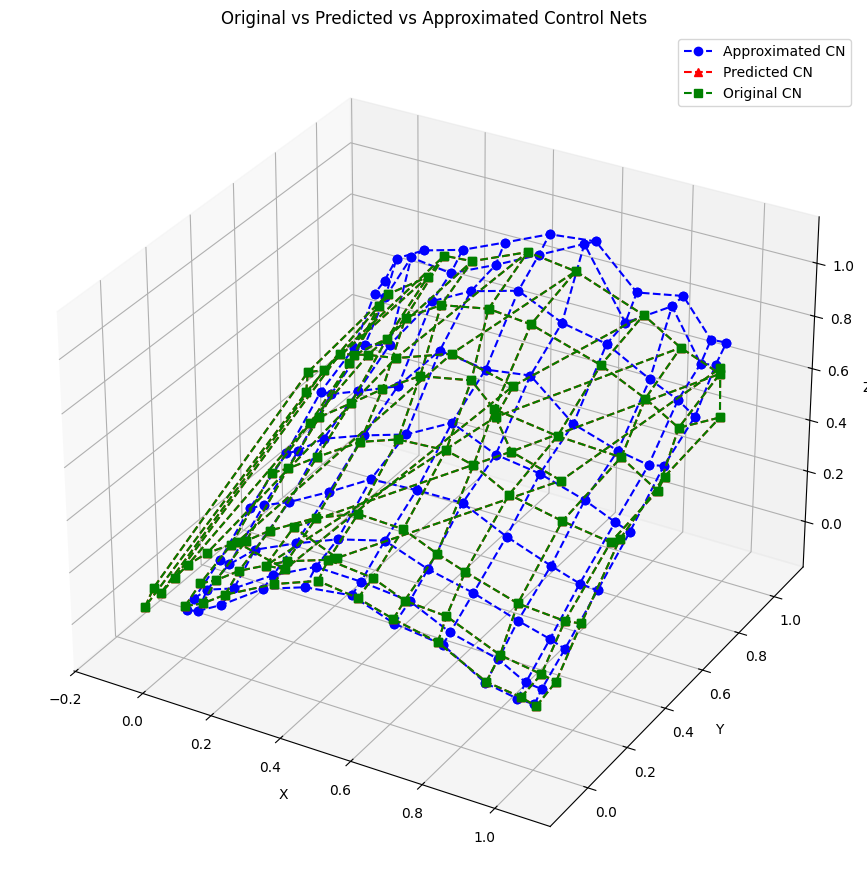

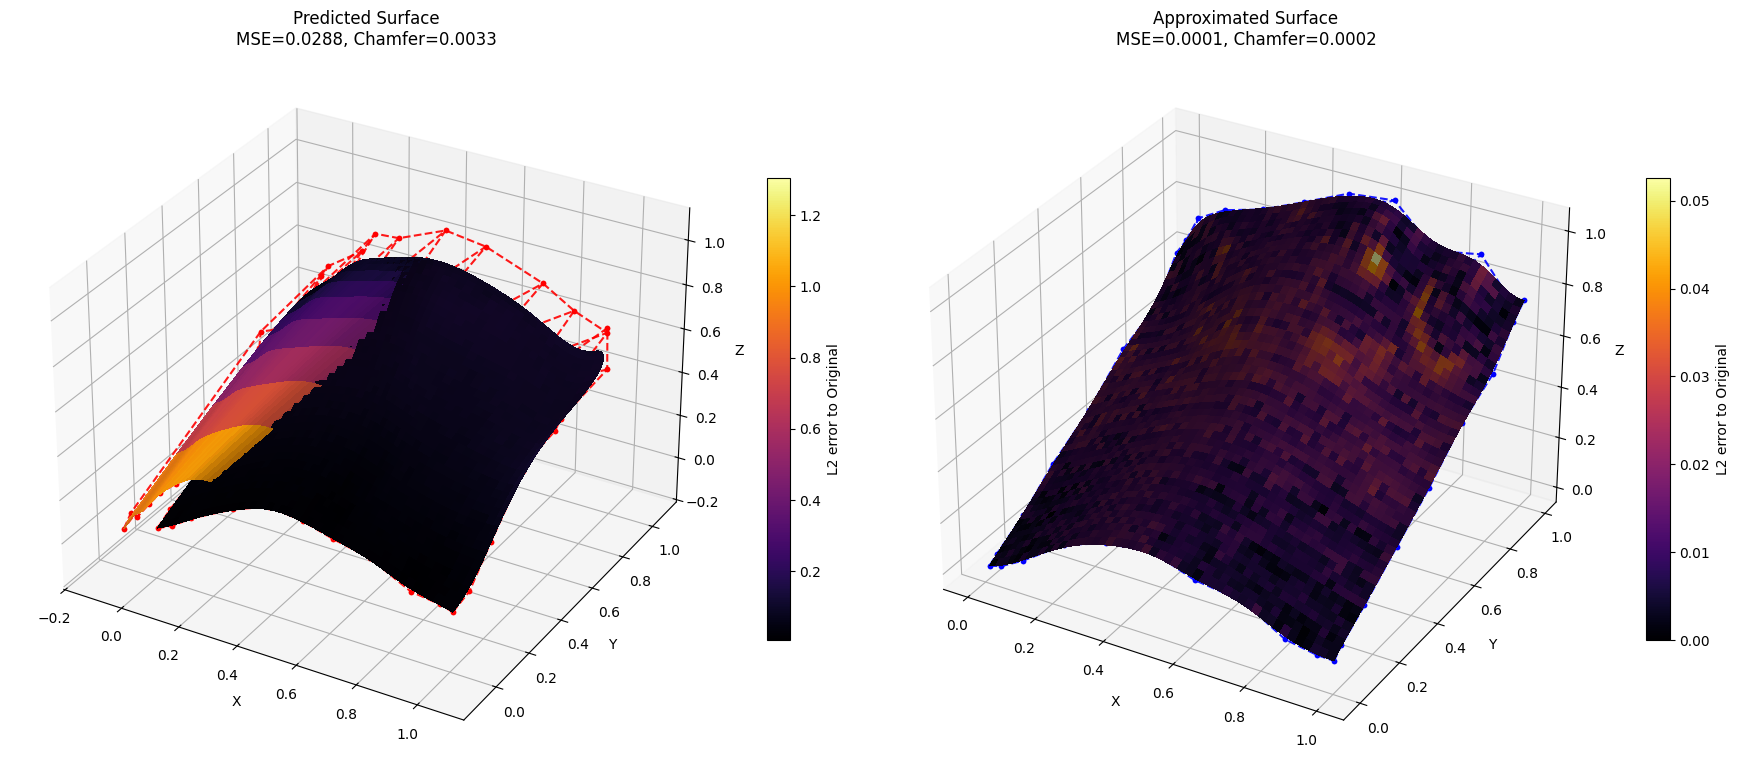

{'mse_ctrl_net_predicted': 0.0,
 'mse_ctrl_net_approximated': 0.06934629393288787,
 'chamfer_ctrl_net_predicted': 0.0,
 'chamfer_ctrl_net_approximated': 0.011207558876768536,
 'mse_surface_predicted': 0.028830936804856534,
 'mse_surface_approximated': 7.49241443925449e-05,
 'chamfer_surface_predicted': 0.003342801871882881,
 'chamfer_surface_approximated': 0.0002451015406791439}

In [2]:
import numpy as np



def map_patch_to_model_input(patch_xyz: np.ndarray, uv_grid: np.ndarray):
    return {
        "points":          patch_xyz.astype(np.float32),
        "control_net":     patch_xyz.astype(np.float32), # uv_grid.astype(np.float32),
        "nurbs_surface":   None,
        "tfm":             None,
        "rotation_angle":  None,
        "z_gap":           None
    }

# --- Example usage with your demo data ---
data = np.load("/home/ainsworth/master/lidar/patches/patches_50x50_AABB.npz")

patches = data["patches_norm"]      # (32, 50, 50, 3)
uv = data["uv_grids"]               # (32, 50, 50, 2)
tile_bounds = data["tile_bounds"]   # (32, 2, 2)
aabbs = data["aabbs"]               # (32, 2, 3)

# Example: map first patch to model input
patch0 = patches[20]
uv0 = uv[20]

patch0 = patches[2]
uv0 = uv[2]



patch0 = patches[24]
uv0 = uv[24]



patch0 = patches[9]
uv0 = uv[9]


patch0 = patches[20]
uv0 = uv[20]


model_input = map_patch_to_model_input(patch0, uv0)
print(model_input.keys())



import DatasetGeneratorKoons

from tensorflow.keras.utils import register_keras_serializable


def laplacian(grid):
    """
    grid : (B, H, W, C) tensor – C = 3 for (x,y,z)
    returns channel-wise 4-neighbour Laplacian with SAME shape.
    """
    lap_k = tf.constant([[0, 1, 0],
                         [1, -4, 1],
                         [0, 1, 0]], tf.float32)  # (3,3)
    lap_k = lap_k[..., tf.newaxis, tf.newaxis]  # (3,3,1,1)

    C = tf.shape(grid)[-1]  # channel count at run-time
    lap_k = tf.tile(lap_k, [1, 1, C, 1])  # (3,3,C,1)

    return tf.nn.depthwise_conv2d(grid, lap_k,
                                  strides=[1, 1, 1, 1],
                                  padding='SAME')  # (B,H,W,C)


# ─────────────────────────────────────────────────────────────────────

@register_keras_serializable(package='CustomLosses', name='total_loss')
def total_loss(y_true, y_pred, w_lap=0.05):
    mse = tf.reduce_mean(tf.square(y_true - y_pred))
    lap = tf.reduce_mean(tf.square(laplacian(y_true) - laplacian(y_pred)))
    return mse + w_lap * lap














#dataset_file = "dataset/dataset_10_surfaces_noise0.1_2605_2032.pkl"



import os
os.environ["CUDA_VISIBLE_DEVICES"] = "2"
# Import necessary packages and the compare library
import pickle
import numpy as np
import matplotlib.pyplot as plt
import surface_compare_coons
import surface_compare

import tensorflow as tf

# Load a sample dataset entry (assumed to be saved as a pickle file)
# Replace 'sample_entry.pkl' with your actual dataset entry file path.

# Import the non-visualization and visualization libraries
import DatasetGenerator
import nurbs_vis
import pickle
import pandas as pd


entry2 = model_input
# Load the dataset from file.
#with open(dataset_file, "rb") as f:
#    entry = pickle.load(f)

# Visualize the first dataset entry from the loaded dataset.
#nurbs_vis.visualize_dataset_entry(entry[49])



# models/coons_surface_incept_20251019_2047_30ep.keras
# Load the trained model from the provided file.
model = tf.keras.models.load_model("models/coons_surface_incept_20251027_1123_40ep.keras",
#model = tf.keras.models.load_model("models/coons_surface_incept_20250906_1951_150ep.keras",
                   custom_objects={'total_loss': total_loss})
#model = tf.keras.models.load_model("models/incept_surface_0904_0626_200ep_1.9432.keras")

#model = tf.keras.models.load_model("models/incept_surface_0704_1040_200ep_1.1381.keras")
#model.summary()

# Create a dummy input sample matching the model's expected input shape (1, 100, 100, 3).
# Replace this with your actual test image or data sample.
#test_entry = entry["data"][9]
test_entry = entry2

dummy_input =   DatasetGeneratorKoons.prepare_input_for_model(test_entry, target_shape=(50, 50, 3))

print(dummy_input)

# Use the model to predict the control net.
predicted_ctrl_net = model.predict(dummy_input)

#summary = surface_compare.compare_control_net_negative_padding(predicted_ctrl_net)

predicted_ctrl_net = surface_compare.remove_negative_and_shrink_control_net(predicted_ctrl_net)



# Display the shape and a snippet of the predicted control net.
print("Predicted control net shape:", predicted_ctrl_net.shape)
print(" control net shape:", test_entry["control_net"].shape)
#print("Predicted control net values (snippet):\n", predicted_ctrl_net[0])

test_entry["control_net"] = predicted_ctrl_net


metrics = surface_compare_coons.compare_surfaces(entry2, predicted_ctrl_net, num_samples=50, show_control_net=True)




# Convert to a structured DataFrame
df_metrics = pd.DataFrame([metrics])

# Display in an interactive table
print(df_metrics.to_markdown(index=False, floatfmt=".6f"))



surface_compare_coons.compare_approximated_control_nets_new(
    original_entry=test_entry,
    predicted_ctrl_net= predicted_ctrl_net,
    degree_u=3,       # Adjust as in your data generation settings
    degree_v=3,
    show_surface=True,
    centri=True
    # ctrlpts_size_u and ctrlpts_size_v are automatically derived from predicted_ctrl_net's shape (e.g., 4, 7)
)




Patch 24
Shape: (50, 50, 3)
AABB min: [7.2071850e+05 4.9441790e+06 8.2320752e+02], max: [7.20789500e+05 4.94422150e+06 8.63219971e+02]
UV range: u=[0.01, 0.99], v=[0.01, 0.99]


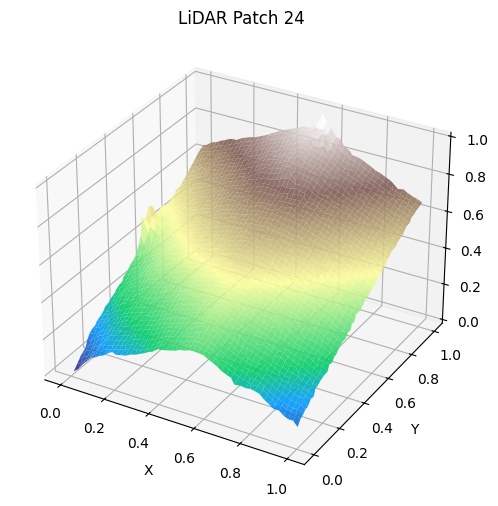

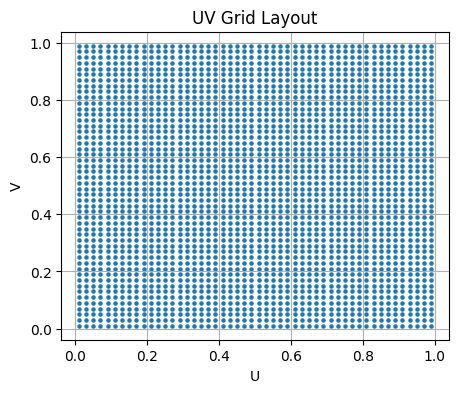

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# --- Load the dataset ---
data = np.load("/home/ainsworth/master/lidar/patches/patches_50x50_AABB.npz")
patches = data["patches_norm"]
uv = data["uv_grids"]
tile_bounds = data["tile_bounds"]
aabbs = data["aabbs"]

# --- Select a patch to inspect ---
PATCH_INDEX = 24
patch = patches[PATCH_INDEX]
uv_grid = uv[PATCH_INDEX]
aabb = aabbs[PATCH_INDEX]

print(f"Patch {PATCH_INDEX}")
print(f"Shape: {patch.shape}")
print(f"AABB min: {aabb[0]}, max: {aabb[1]}")
print(f"UV range: u=[{uv_grid[...,0].min():.2f}, {uv_grid[...,0].max():.2f}], "
      f"v=[{uv_grid[...,1].min():.2f}, {uv_grid[...,1].max():.2f}]")

# --- Visualize the patch in 3D ---
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(
    patch[...,0], patch[...,1], patch[...,2],
    cmap='terrain', edgecolor='none', alpha=0.9
)
ax.set_title(f"LiDAR Patch {PATCH_INDEX}")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.show()

# --- Optional: visualize UV grid (2D layout) ---
plt.figure(figsize=(5,4))
plt.scatter(uv_grid[...,0], uv_grid[...,1], s=5)
plt.title("UV Grid Layout")
plt.xlabel("U")
plt.ylabel("V")
plt.grid(True)
plt.show()


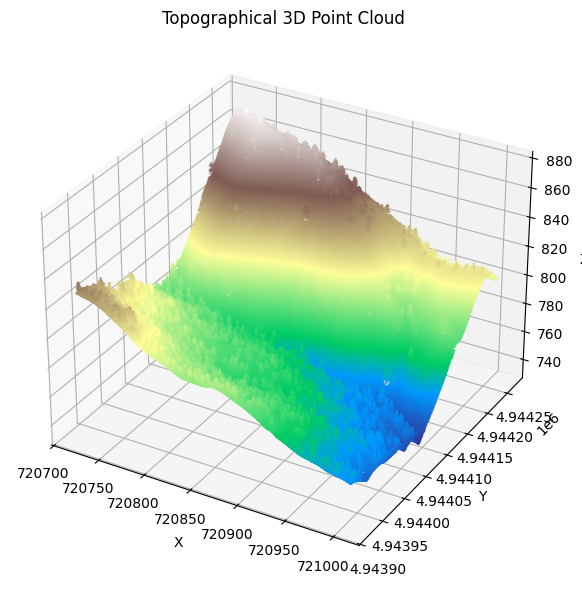

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import laspy

# Load your .laz file
las = laspy.read("lidar/points (2).laz")

# Extract coordinates
x, y, z = las.x, las.y, las.z

# Downsample if it's large
n = len(x)
sample_size = min(200_000, n)
idx = np.random.default_rng(42).choice(n, size=sample_size, replace=False)
xs, ys, zs = x[idx], y[idx], z[idx]

# Plot in 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d")
p = ax.scatter(x, y, z, c=z, cmap="terrain", s=0.5)
#fig.colorbar(p, ax=ax, label="Elevation (Z)")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("Topographical 3D Point Cloud")
plt.tight_layout()
plt.show()
